In [1]:
import rdkit

In [ ]:
!pip i

In [2]:
rdkit.__version__

'2023.09.5'

In [3]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.stats import spearmanr
import numpy as np
from keras.models import load_model
import config
import smi_utils
import pandas as pd

2024-03-26 12:23:23.841611: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-26 12:23:24.121932: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-26 12:23:25.942905: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
# load the model
model = load_model(config.best_model)

2024-03-26 12:23:32.046422: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [5]:
# load data
x_train = np.loadtxt("./input/x_train.txt")
x_val = np.loadtxt("./input/x_val.txt")
x_test = np.loadtxt("./input/x_test.txt")

y_train = np.loadtxt("./input/y_train.txt")
y_val = np.loadtxt("./input/y_val.txt")
y_test = np.loadtxt("./input/y_test.txt")

train results
311/311 [==============================] - 189s 603ms/step
r2: 0.8326
sp: 0.9082
rmse: 0.9018
mae: 0.6426


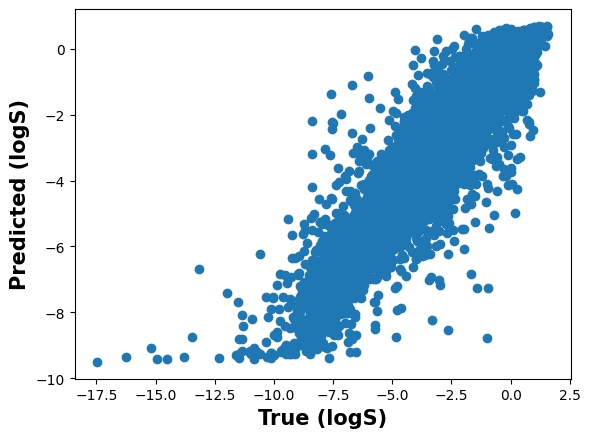

val results
28/28 [==============================] - 16s 555ms/step
r2: 0.7746
sp: 0.8748
rmse: 1.0337
mae: 0.7269


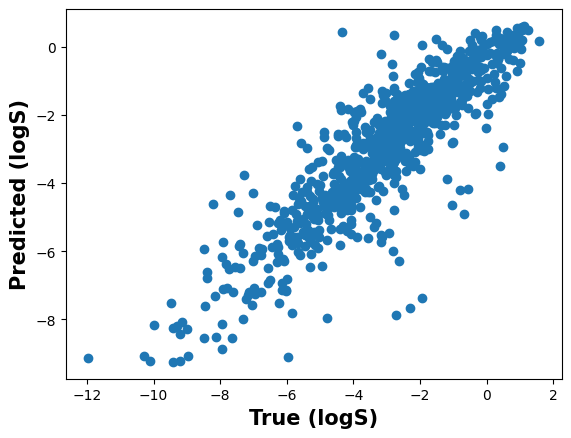

test results
28/28 [==============================] - 16s 577ms/step
r2: 0.7792
sp: 0.8911
rmse: 1.0311
mae: 0.6982


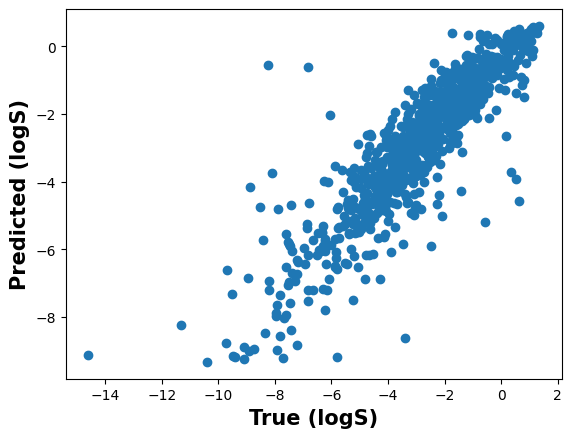

In [6]:
# make predictions
smi_utils.get_results(db_name='train', X=x_train, y=y_train, model=model)
smi_utils.get_results(db_name='val', X=x_val, y=y_val, model=model)
smi_utils.get_results(db_name='test', X=x_test, y=y_test, model=model)